In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import BaggingClassifier
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Fraud_check.csv')

In [5]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data1= data.rename(columns={"Undergrad": "Undergrad","Marital.Status":"Relationship","Taxable.Income":"Tax","City.Population":"Population","Work.Experience":"Experience","Urban":"Urban"})

In [8]:
data1.head()

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
data1['Tax'] = data1.Tax.map(lambda taxable_income:'Risky' if taxable_income <= 30000 else 'Good')

In [10]:
data1.head()

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [11]:
#Preprocessing the data set
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data1['Tax'] = label_encoder.fit_transform(data1['Tax'])
data1['Undergrad'] = label_encoder.fit_transform(data1['Undergrad'])
data1['Relationship'] = label_encoder.fit_transform(data1['Relationship'])
data1['Urban'] = label_encoder.fit_transform(data1['Urban'])

In [12]:
data1.head()

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


(array([[600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  58.,  73.,  72.,  72.,  74.,  69.,  63.,  54.,  65.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  19977.8,  39955.6,  59933.4,  79911.2,  99889. ,
        119866.8, 139844.6, 159822.4, 179800.2, 199778. ]),
 <a list of 6 BarContainer objects>)

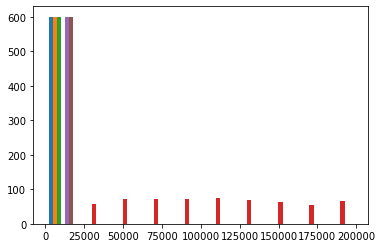

In [13]:
plt.hist(data1)

<AxesSubplot:xlabel='Population', ylabel='count'>

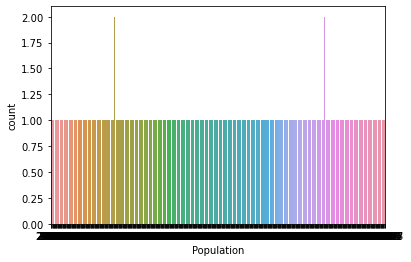

In [15]:
import seaborn as sns
sns.countplot(data1['Population'])

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

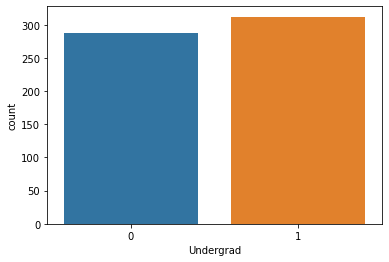

In [18]:
sns.countplot(data1['Undergrad'])

<AxesSubplot:xlabel='Relationship', ylabel='count'>

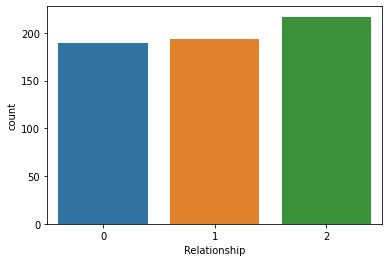

In [19]:
sns.countplot(data1['Relationship'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

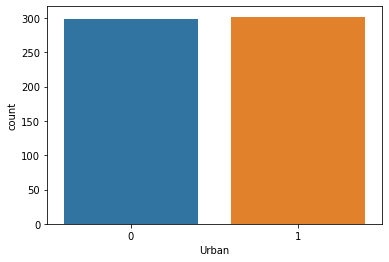

In [20]:
sns.countplot(data1['Urban'])

<AxesSubplot:>

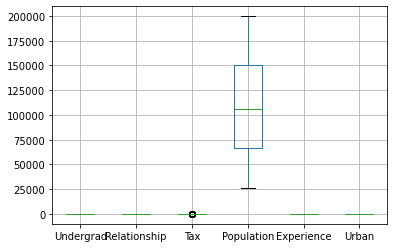

In [21]:
data1.boxplot()

<Figure size 3600x3600 with 0 Axes>

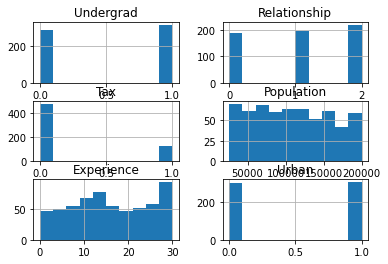

<Figure size 3600x3600 with 0 Axes>

In [22]:
data1.hist()
plt.figure(figsize=(50,50))

In [15]:
x = data1[['Undergrad','Relationship','Population','Experience','Urban']]
y = data1['Tax']

In [16]:
#Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)

In [17]:
model = RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [18]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [19]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.7333333333333333

In [20]:
pd.crosstab(y_pred,y_test)

Tax,0,1
row_0,,
0,130,40
1,8,2


In [21]:
count_misclassified=(y_test != y_pred).sum()
count_misclassified

48

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       138
           1       0.20      0.05      0.08        42

    accuracy                           0.73       180
   macro avg       0.48      0.49      0.46       180
weighted avg       0.63      0.73      0.67       180

